# Example for the usage of the DiffusionAnalysis class

## 1. Imports and defining helper functions
Import the DiffusionAnalysis class and define a helper function

In [1]:
import json

from AnalysisForNanoporousCarbonMaterials.DiffusionAnalysis import DiffusionAnalysis
from AnalysisForNanoporousCarbonMaterials.MembraneStructures import HexagonalMembrane

def analyse_resname(DA, selector: str, short: str):
    print(f"\n{short} analysis")

    DA.calc_passagetimes(selector)
    print(f"\t{short}-passages: " + str(len(DA.passageTimes[selector])))

    DA.calc_diffusion(selector, D_guess = DA.guess_D(selector))
    print(f"\t{short}-Diffusioncoefficient: " + str(DA.D[selector]).replace(".", ","))

    DA.plot_diffusion(selector)

    DA.plot_starting_points("resname HEX and name C1")

    DA.create_rand_passages_plot("resname HEX and name C1", 1)
    

## 2. Create the class object
Define the path where the traj.xtc and the topol.tpr file and the results folder are located.
Then create the class obect.
- The filepaths and the result paths are constructed
- analysis_max_step_size_ps=200 means that if the step size of the traj.xtc file is smaller than that, only every nth frame is stored and analysed to match the 200ps step for efficiency. The actual analysed step size can be seen in the print of the DiffusionAnalysis object. Here 200ps are chosen since we expect for this simulation the transitions through the pore to be slower than 200ps.
- verbose is set to false in this notebook, verbose only works well in terminals.
- L = 180 tells the class that the membrane thickness is 180 Angstrom

In [2]:
path = "/bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/"
print("Path: " + path)

structure = HexagonalMembrane(
            selectors="resname C",
            L=180,
        )

DA = DiffusionAnalysis(
    topology_file=path + "topol.tpr",
    trajectory_file=path + "traj.xtc",
    results_dir=path + "analysis/",
    analysis_max_step_size_ps=200,
    verbose=False,
    membrane = structure
)

print(DA)

Path: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/


/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:202: UserWarning: Cannot write lock/offset file in same location as /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/traj.xtc. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:258: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/.traj.xtc_offsets.npz'
  warnings.warn(f"Couldn't save offsets because: {e}")


DiffusionAnalysis object:
  topology_file: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/topol.tpr
  trajectory_file: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/traj.xtc
  results_dir: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/analysis/
  Membrane: HexagonalMembrane: selectors=['resname C'], 
L=180, 
lowerZ=None, 
isAtomAbove=None, 
isAtomBelow=None
  verbose: False
  trajectories: dict_keys([])
  results: 
      D: {}
      passageTimes: {}
      passageStarts: {}
      passageIndices: {}
      n_passages: {}
  Simulation footprints: 
      u_trajectory_dt (ps): 100.0
      u_sim_time (ps): 2000000.0
      analysis_max_step_size_ps (ps): 200
      actual analysed step_size (ps): 200.0
      nth_frame: 2
      n_frames analysed: 10001
      ana_sim_time (ps): 2000000.0
      u: <Universe with 36930 atoms>
      unique atom-names: {'C1', 'C3', 'C2', 'C'}
      u

## 3. Run the analysis
This is done by calling the class-methods in the following order.
1. find the membrane location in z-direction to define its borders.
2. print and plot the membrane location to verify the found boundaries visually.

Lower boundary of the hexagonal structure: 233.23501586914062 Angstrom


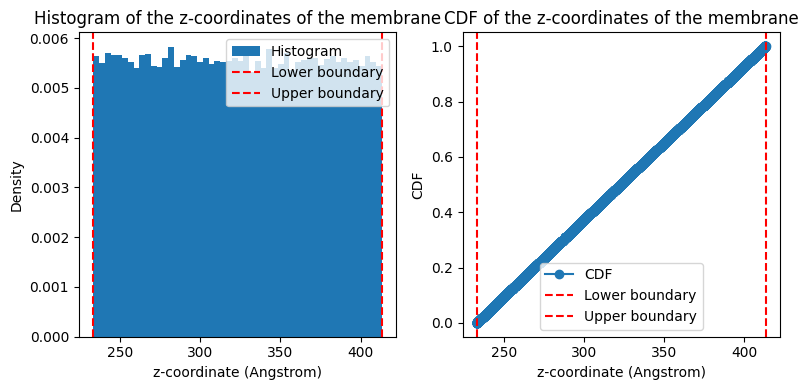

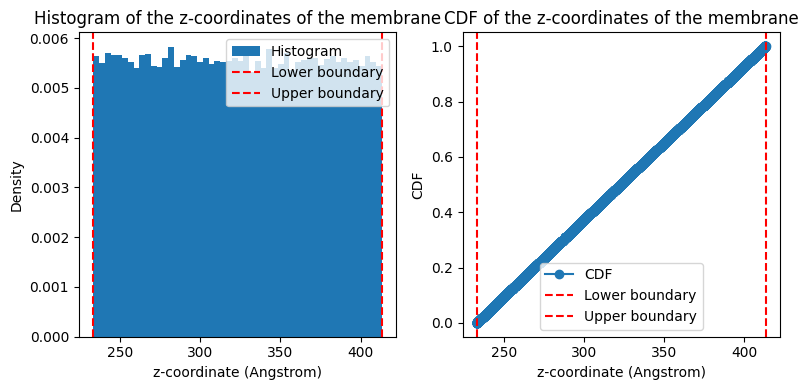

In [3]:

DA.find_membrane_location()
DA.print_membrane_location()
DA.verify_membrane_location()

Now run the analysis for the molecule corresponding to the selector "resname HEX and name C1".


hex_c1 analysis
	hex_c1-passages: 2583
Calculating diffusion coefficient using a PDF fit ...
	hex_c1-Diffusioncoefficient: 89,96664993815703


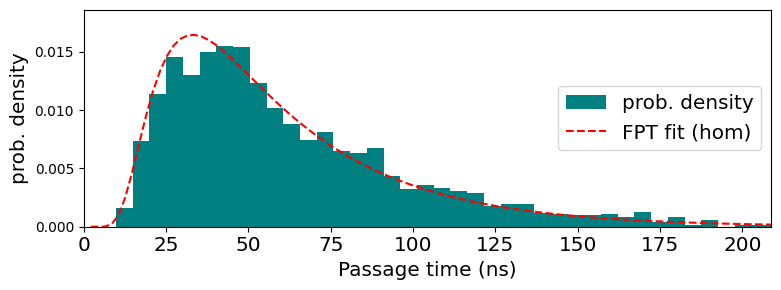

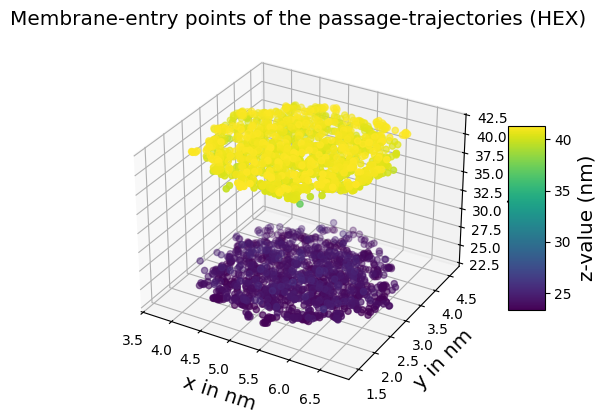

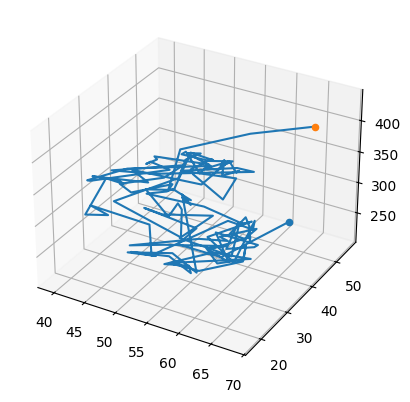

In [4]:
analyse_resname(DA, "resname HEX and name C1", "hex_c1")


dod_c2 analysis
	dod_c2-passages: 905
Calculating diffusion coefficient using a PDF fit ...
	dod_c2-Diffusioncoefficient: 37,55927856838452


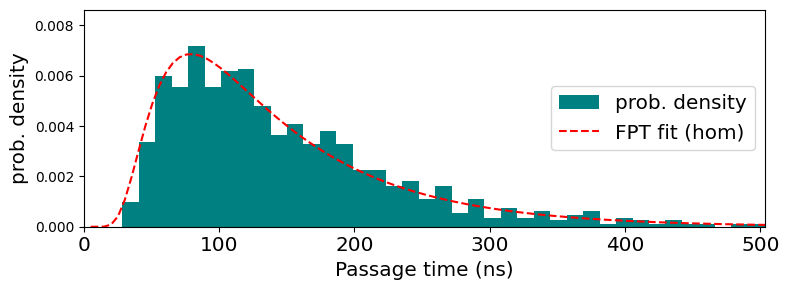

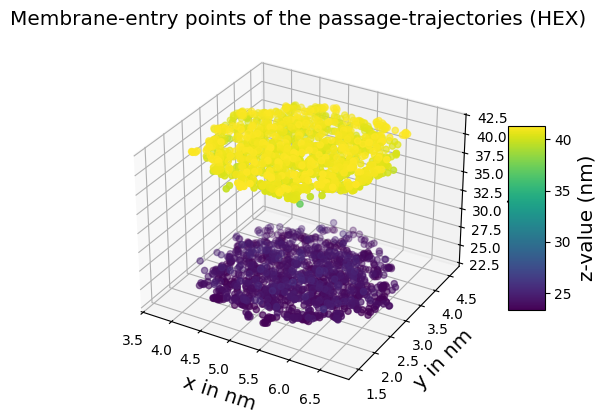

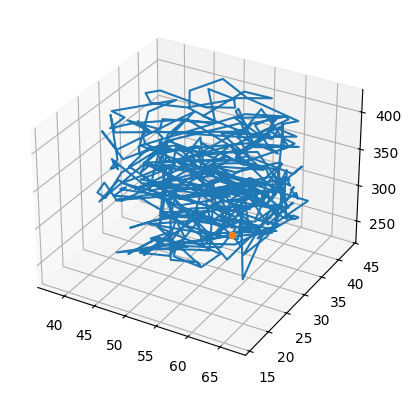

In [5]:
analyse_resname(DA, "resname DOD and name C2", "dod_c2")

In [6]:
print("\n\n\n RESULTS:")
print(json.dumps(DA.D, indent=4))




 RESULTS:
{
    "resname HEX and name C1": 89.96664993815703,
    "resname DOD and name C2": 37.55927856838452
}
